In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
match_details = pd.read_csv('Match.csv')

In [3]:
match_details

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,1082646,Delhi Daredevils,Royal Challengers Bangalore,5/14/2017,2017,Feroz Shah Kotla,Delhi,India,Royal Challengers Bangalore,Royal Challengers Bangalore,Bat,runs,Result,HV Patel,10.0,1
633,633,1082647,Mumbai Indians,Rising Pune Supergiants,5/16/2017,2017,Wankhede Stadium,Mumbai,India,Mumbai Indians,Rising Pune Supergiants,Field,runs,Result,Wasington Sundar,20.0,1
634,634,1082648,Sunrisers Hyderabad,Kolkata Knight Riders,5/17/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Kolkata Knight Riders,Kolkata Knight Riders,Field,wickets,Result,NM Coulter-Nile,7.0,1
635,635,1082649,Mumbai Indians,Kolkata Knight Riders,5/19/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Mumbai Indians,Mumbai Indians,Field,wickets,Result,KV Sharma,6.0,1


In [4]:
match_details.isnull().values.any()

True

In [5]:
match_details.isna().values.any()

True

In [6]:
match_details.columns[match_details.isna().any()].tolist()

['Venue_Name',
 'Toss_Winner',
 'match_winner',
 'Toss_Name',
 'Win_Type',
 'ManOfMach',
 'Win_Margin']

In [7]:
match_details.isnull().sum()

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      1
City_Name       0
Country_Name    0
Toss_Winner     1
match_winner    3
Toss_Name       1
Win_Type        2
Outcome_Type    0
ManOfMach       4
Win_Margin      9
Country_id      0
dtype: int64

In [8]:
match_details.isna().sum()

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      1
City_Name       0
Country_Name    0
Toss_Winner     1
match_winner    3
Toss_Name       1
Win_Type        2
Outcome_Type    0
ManOfMach       4
Win_Margin      9
Country_id      0
dtype: int64

In [9]:
match_details = match_details.dropna(subset=['Toss_Winner', 'match_winner'])

In [10]:
match_details

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1
1,1,335988,Kings XI Punjab,Chennai Super Kings,4/19/2008,2008,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,Chennai Super Kings,Chennai Super Kings,bat,runs,Result,MEK Hussey,33.0,1
2,2,335989,Delhi Daredevils,Rajasthan Royals,4/19/2008,2008,Feroz Shah Kotla,Delhi,India,Rajasthan Royals,Delhi Daredevils,bat,wickets,Result,MF Maharoof,9.0,1
3,3,335990,Mumbai Indians,Royal Challengers Bangalore,4/20/2008,2008,Wankhede Stadium,Mumbai,India,Mumbai Indians,Royal Challengers Bangalore,bat,wickets,Result,MV Boucher,5.0,1
4,4,335991,Kolkata Knight Riders,Deccan Chargers,4/20/2008,2008,Eden Gardens,Kolkata,India,Deccan Chargers,Kolkata Knight Riders,bat,wickets,Result,DJ Hussey,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,1082646,Delhi Daredevils,Royal Challengers Bangalore,5/14/2017,2017,Feroz Shah Kotla,Delhi,India,Royal Challengers Bangalore,Royal Challengers Bangalore,Bat,runs,Result,HV Patel,10.0,1
633,633,1082647,Mumbai Indians,Rising Pune Supergiants,5/16/2017,2017,Wankhede Stadium,Mumbai,India,Mumbai Indians,Rising Pune Supergiants,Field,runs,Result,Wasington Sundar,20.0,1
634,634,1082648,Sunrisers Hyderabad,Kolkata Knight Riders,5/17/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Kolkata Knight Riders,Kolkata Knight Riders,Field,wickets,Result,NM Coulter-Nile,7.0,1
635,635,1082649,Mumbai Indians,Kolkata Knight Riders,5/19/2017,2017,M Chinnaswamy Stadium,Bengaluru,India,Mumbai Indians,Mumbai Indians,Field,wickets,Result,KV Sharma,6.0,1


In [11]:
match_details.isna().sum()

Match_SK        0
match_id        0
Team1           0
Team2           0
match_date      0
Season_Year     0
Venue_Name      0
City_Name       0
Country_Name    0
Toss_Winner     0
match_winner    0
Toss_Name       0
Win_Type        1
Outcome_Type    0
ManOfMach       0
Win_Margin      6
Country_id      0
dtype: int64

In [12]:
won = 0
for index, row in match_details.iterrows():
    if row['Toss_Winner'] == row['match_winner']:
        won += 1
        
won

324

In [13]:
loss = len(match_details) - won
loss

309

In [14]:
hypo_1 = pd.DataFrame({'Match results': ['Won', 'Lost'], 'No. of matches': [324, 309]})

## Hypothesis 1: Event of winning the toss is positively correlated with the event of a team winning the game

<BarContainer object of 2 artists>

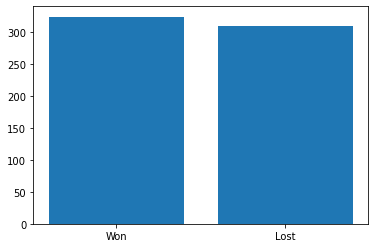

In [15]:
plt.bar(hypo_1['Match results'], height=hypo_1['No. of matches'])

### From the given plot we can see that the bar "Won" which depicts the number of times team has won the match after winning the toss is similar to the bar "Lost" which depicts the number of times team has won the match after lossing the toss. Hence, we see that there is no such trend and hence we reject the hypothesis.

In [16]:
overs_details = pd.read_csv('Ball_By_Ball.csv')

In [17]:
overs_details

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,...,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
0,598028,15,6,1,5,2,6.0,No Extras,4,0,...,-1,-1,20343,82,-1,4,1,0,0,20130420
1,598028,14,1,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420
2,598028,14,2,1,5,2,3.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420
3,598028,14,3,1,5,2,5.0,No Extras,1,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420
4,598028,14,4,1,5,2,3.0,No Extras,0,0,...,-1,-1,20348,345,-1,4,1,0,0,20130420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150446,598028,15,1,1,5,2,5.0,No Extras,1,0,...,-1,-1,20343,82,-1,4,1,0,0,20130420
150447,598028,15,2,1,5,2,3.0,No Extras,2,0,...,-1,-1,20343,82,-1,4,1,0,0,20130420
150448,598028,15,3,1,5,2,3.0,No Extras,4,0,...,-1,-1,20343,82,-1,4,1,0,0,20130420
150449,598028,15,4,1,5,2,3.0,No Extras,0,0,...,20349,348,20343,82,20328,4,1,0,0,20130420


In [18]:
overs_details['Over_id'].unique()

array([15, 14, 13, 12, 11, 10,  3,  2,  1, 16, 17, 18,  9,  8,  7, 20,  4,
        5,  6, 19])

In [19]:
over_details_death = overs_details[overs_details['Over_id']>16]

In [20]:
over_details_death

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,...,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
58,598063,17,1,2,5,3,6.0,No Extras,0,0,...,-1,-1,21114,70,-1,4,2,0,0,20130512
59,598063,17,2,2,5,3,6.0,No Extras,1,0,...,-1,-1,21114,70,-1,4,2,0,0,20130512
60,598063,17,3,2,5,3,5.0,No Extras,4,0,...,-1,-1,21114,70,-1,4,2,0,0,20130512
61,598063,17,4,2,5,3,5.0,No Extras,0,0,...,-1,-1,21114,70,-1,4,2,0,0,20130512
62,598063,17,5,2,5,3,5.0,No Extras,0,0,...,-1,-1,21114,70,21099,4,2,0,0,20130512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150435,598028,17,2,1,5,2,7.0,No Extras,0,0,...,-1,-1,20340,60,-1,4,1,0,0,20130420
150436,598028,17,3,1,5,2,7.0,No Extras,0,0,...,20349,348,20340,60,20337,4,1,0,0,20130420
150437,598028,17,4,1,5,2,6.0,No Extras,1,0,...,-1,-1,20340,60,-1,4,1,0,0,20130420
150438,598028,17,5,1,5,2,8.0,No Extras,1,0,...,-1,-1,20340,60,-1,4,1,0,0,20130420


In [21]:
player = pd.read_csv('Player.csv', encoding= 'unicode_escape')

In [22]:
player

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,7/8/1972,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
3,3,4,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan
...,...,...,...,...,...,...,...
492,492,493,T Natarajan,5/27/1991,Left-hand bat,Left-arm medium,India
493,493,494,Tejas Baroka,2/1/1996,Right-hand bat,Legbreak googly,India
494,494,495,TS Mills,8/12/1992,Right-hand bat,Left-arm fast,England
495,495,496,Vishnu Vinod,12/2/1993,Right-hand bat,NaN,India


In [23]:
player['Bowling_skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Right-arm fast-medium',
       'Legbreak googly', 'Right-arm medium-fast', 'Left-arm fast-medium',
       'Slow left-arm orthodox', nan, 'Slow left-arm chinaman',
       'Left-arm medium-fast', 'Legbreak', 'Right-arm fast',
       'Right-arm bowler', 'Left-arm medium', 'Left-arm fast',
       'Right-arm medium fast', '\xa0Legbreak',
       '\xa0Right-arm fast-medium', '\xa0Right-arm medium-fast',
       '\xa0Left-arm fast', '\xa0Right-arm offbreak'], dtype=object)

In [24]:
fast_bowlers = player[(player['Bowling_skill']=='Right-arm medium')|(player['Bowling_skill']=='Right-arm fast-medium')|(player['Bowling_skill']=='Right-arm medium-fast')|(player['Bowling_skill']=='Left-arm fast-medium')|(player['Bowling_skill']=='Left-arm medium-fast')|(player['Bowling_skill']=='Right-arm fast')|(player['Bowling_skill']=='Left-arm fast')|(player['Bowling_skill']=='Left-arm medium')|(player['Bowling_skill']=='Right-arm medium fast')|(player['Bowling_skill']=='\xa0Right-arm fast-medium')|(player['Bowling_skill']=='\xa0Right-arm medium-fast')|(player['Bowling_skill']=='\xa0Left-arm fast')]

In [25]:
slow_bowlers = player[(player['Bowling_skill']=='Right-arm offbreak')|(player['Bowling_skill']=='Legbreak googly')|(player['Bowling_skill']=='Slow left-arm orthodox')|(player['Bowling_skill']=='Slow left-arm chinaman')|(player['Bowling_skill']=='Legbreak')|(player['Bowling_skill']=='Right-arm bowler')|(player['Bowling_skill']=='\xa0Legbreak')|(player['Bowling_skill']=='\xa0Right-arm offbreak')]

In [26]:
fast_bowlers

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,7/8/1972,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
7,7,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India
8,8,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa
...,...,...,...,...,...,...,...
485,485,486,Mohammed Siraj,3/13/1994,Right-hand bat,Right-arm medium-fast,India
486,486,487,NB Singh,9/8/1995,Right-hand bat,Right-arm medium,India
487,487,488,RA Tripathi,3/2/1991,Right-hand bat,Right-arm medium,India
492,492,493,T Natarajan,5/27/1991,Left-hand bat,Left-arm medium,India


In [27]:
slow_bowlers

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
3,3,4,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan
5,5,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India
6,6,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India
9,9,10,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia
...,...,...,...,...,...,...,...
488,488,489,Rashid Khan,11/20/1998,Right-hand bat,Legbreak googly,Afghanistan
489,489,490,RD Chahar,8/4/1999,Right-hand bat,Legbreak googly,India
491,491,492,SS Agarwal,11/21/1993,Right-hand bat,Legbreak googly,India
493,493,494,Tejas Baroka,2/1/1996,Right-hand bat,Legbreak googly,India


In [28]:
fast_data = pd.merge(over_details_death, fast_bowlers, how = 'inner', left_on=['BOWLER_SK'], right_on=['PLAYER_SK'])

In [29]:
slow_data = pd.merge(over_details_death, slow_bowlers, how = 'inner', left_on=['BOWLER_SK'], right_on=['PLAYER_SK'])

In [30]:
fast_data

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,...,Keeper_Catch,Player_out_sk,MatchDateSK,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,598063,17,1,2,5,3,6.0,No Extras,0,0,...,0,0,20130512,70,71,DJ Bravo,10/7/1983,Right-hand bat,Right-arm medium-fast,West Indies
1,598063,17,2,2,5,3,6.0,No Extras,1,0,...,0,0,20130512,70,71,DJ Bravo,10/7/1983,Right-hand bat,Right-arm medium-fast,West Indies
2,598063,17,3,2,5,3,5.0,No Extras,4,0,...,0,0,20130512,70,71,DJ Bravo,10/7/1983,Right-hand bat,Right-arm medium-fast,West Indies
3,598063,17,4,2,5,3,5.0,No Extras,0,0,...,0,0,20130512,70,71,DJ Bravo,10/7/1983,Right-hand bat,Right-arm medium-fast,West Indies
4,598063,17,5,2,5,3,5.0,No Extras,0,0,...,0,0,20130512,70,71,DJ Bravo,10/7/1983,Right-hand bat,Right-arm medium-fast,West Indies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21656,598030,20,1,2,4,10,5.0,No Extras,1,0,...,0,0,20130421,357,358,LJ Wright,3/7/1985,Right-hand bat,Right-arm medium-fast,England
21657,598030,20,2,2,4,10,4.0,No Extras,1,0,...,0,0,20130421,357,358,LJ Wright,3/7/1985,Right-hand bat,Right-arm medium-fast,England
21658,598030,20,3,2,4,10,5.0,No Extras,6,0,...,0,0,20130421,357,358,LJ Wright,3/7/1985,Right-hand bat,Right-arm medium-fast,England
21659,598030,20,4,2,4,10,5.0,No Extras,2,0,...,0,0,20130421,357,358,LJ Wright,3/7/1985,Right-hand bat,Right-arm medium-fast,England


In [31]:
slow_data

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,...,Keeper_Catch,Player_out_sk,MatchDateSK,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,598063,18,1,2,5,3,6.0,No Extras,6,0,...,0,0,20130512,34,35,RA Jadeja,12/6/1988,Left-hand bat,Slow left-arm orthodox,India
1,548360,18,1,2,7,3,3.0,No Extras,1,0,...,0,0,20120506,34,35,RA Jadeja,12/6/1988,Left-hand bat,Slow left-arm orthodox,India
2,548384,20,1,2,7,3,9.0,No Extras,1,0,...,0,0,20120523,34,35,RA Jadeja,12/6/1988,Left-hand bat,Slow left-arm orthodox,India
3,548384,20,2,2,7,3,10.0,No Extras,4,0,...,0,0,20120523,34,35,RA Jadeja,12/6/1988,Left-hand bat,Slow left-arm orthodox,India
4,548384,20,3,2,7,3,10.0,No Extras,1,0,...,0,0,20120523,34,35,RA Jadeja,12/6/1988,Left-hand bat,Slow left-arm orthodox,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,419131,17,2,1,8,5,5.0,No Extras,1,0,...,0,0,20100326,229,230,AC Voges,10/4/1979,Right-hand bat,Slow left-arm orthodox,Australia
4737,419131,17,3,1,8,5,8.0,No Extras,1,0,...,0,0,20100326,229,230,AC Voges,10/4/1979,Right-hand bat,Slow left-arm orthodox,Australia
4738,419131,17,4,1,8,5,5.0,No Extras,1,0,...,0,0,20100326,229,230,AC Voges,10/4/1979,Right-hand bat,Slow left-arm orthodox,Australia
4739,419131,17,5,1,8,5,8.0,No Extras,1,0,...,0,0,20100326,229,230,AC Voges,10/4/1979,Right-hand bat,Slow left-arm orthodox,Australia


In [32]:
fast_pivot = pd.pivot_table(fast_data, index = ['MatcH_id', 'Innings_No'], columns = 'Over_id', values = 'Runs_Scored', aggfunc = 'sum', fill_value=0)

In [33]:
slow_pivot = pd.pivot_table(slow_data, index = ['MatcH_id', 'Innings_No'], columns = 'Over_id', values = 'Runs_Scored', aggfunc = 'sum', fill_value=0)

In [34]:
fast_pivot

Over_id              17  18  19  20
MatcH_id Innings_No                
335987   1           14   7  21  22
335988   1           14  17  15  25
         2            9   0   7   9
335989   1            0   1   0   8
335990   1           10  20   9   7
...                  ..  ..  ..  ..
1082647  2            4  13   9   9
1082648  1            0  13   3   6
1082649  1            7   5   1   0
1082650  1            4  12  10  12
         2            3   7  11   8

[1147 rows x 4 columns]

In [35]:
slow_pivot

Over_id              17  18  19  20
MatcH_id Innings_No                
335988   2            0   4   0   0
335989   1            4   0  10   0
335990   2           10   0   8   0
335991   1           19   0   5   0
         2            3   0   8   0
...                  ..  ..  ..  ..
1082639  1            6  13   0   0
1082643  2            0   0   4   0
1082644  1            9   0  11   0
1082646  2            0   8   0   2
1082648  1            2   0   0   0

[578 rows x 4 columns]

In [36]:
len(fast_pivot)

1147

In [37]:
total_fast_overs = 0
total_fast_runs = 0
for i in range(0, len(fast_pivot)):
    for j in fast_pivot.values[i]:
        total_fast_runs = total_fast_runs + j
        if j != 0:
            total_fast_overs += 1

In [38]:
total_fast_overs

3516

In [39]:
total_fast_runs

32674

In [40]:
total_slow_overs = 0
total_slow_runs = 0
for i in range(0, len(slow_pivot)):
    for j in slow_pivot.values[i]:
        total_slow_runs = total_slow_runs + j
        if j != 0:
            total_slow_overs += 1

In [41]:
total_slow_overs

797

In [42]:
total_slow_runs

6980

In [43]:
fast_economy = total_fast_runs/total_fast_overs

In [44]:
slow_economy = total_slow_runs/total_slow_overs

In [45]:
hypo_1 = pd.DataFrame({'Bowler type': ['Fast', 'Slow'], 'Economy': [fast_economy, slow_economy]})

## Hypothesis 2: Fast bowlers are more effective than spinners during death overs. (Death over – Last 4 overs of the innings)

Note: Here we are assuming that the last 4 overs of the innings are overs 17-20.

<BarContainer object of 2 artists>

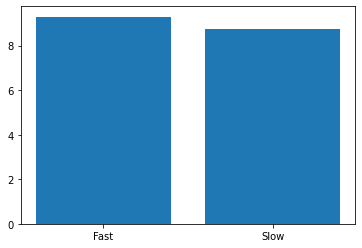

In [46]:
plt.bar(hypo_1['Bowler type'], height=hypo_1['Economy'])

In [52]:
print("The economy rate of fast bowlers is", fast_economy)

The economy rate of fast bowlers is 9.292946530147896


In [53]:
print("The economy rate of slow bowlers is", slow_economy)

The economy rate of slow bowlers is 8.75784190715182


### Here we can see that fast bowlers have a higher economy rate as compared to spinners, hence we reject the hypothesis as spinners which have a lower economy rate are more effective.